In [2]:
#import the libraries for data wrangling and visualizations
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
import numpy as np 
from numpy import allclose
import os 
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression

In [3]:
#list out the models and their RMSE and MAPE scores 

#Original 
Original_RMSE_ng = [[0.224422], [0.23386], [0.171862], [0.156278], [0.165706], [0.153409], [0.162167], [0.187417]]
Original_MAPE_ng = [[32.11686405077653], [49.92031050639451], [36.983857600596046], [36.69875888816223], [49.78390309018737], [69.08271069445603], [37.251651179176385], [51.692027045597676]]

Original_RMSE_wind = [[0.120663], [0.111771], [0.118011], [0.118516], [0.136907], [0.105567], [0.123962], [0.14308]]
Original_MAPE_wind =  [[81.7958882860977], [76.6581467745456], [76.90623373679436], [69.55946845398321], [80.13775444134168], [49.275363616606235], [76.00347879336282], [69.6634705195283]]

#GRU 
GRU_RMSE_ng = [[0.230989], [0.213656], [0.177054], [0.185482], [0.16976], [0.130775], [0.142964], [0.165916]]
GRU_MAPE_ng = [[30.33538943783999], [46.94972618027645], [31.639475338767898], [57.87984072156256], [55.35697605460839], [48.35997511844342], [29.760317884216835], [40.34583858333299]]

GRU_RMSE_wind = [[0.117231], [0.122223], [0.123329], [0.112067], [0.139512], [0.102553], [0.129268], [0.141809]]
GRU_MAPE_wind =  [[75.57108833703907], [119.46146836059108], [65.54021402714287], [83.960896566459], [67.68937239152405], [55.97911104080681], [83.86036714746496], [70.06380990920472]]

#RNN 

RNN_RMSE_ng =  [[0.129392], [0.112296], [0.119903], [0.112964], [0.131978], [0.094598], [0.142316], [0.156777]]
RNN_MAPE_ng =  [[68.8801102279027], [87.1307013817458], [88.41869760379146], [96.73603048909217], [71.50458372864276], [59.32367427206561], [64.79322972517474], [58.849020916822994]]

RNN_RMSE_wind=   [[0.123954], [0.11531], [0.121297], [0.113762], [0.135338], [0.100635], [0.129632], [0.145404]]
RNN_MAPE_wind = [[80.22568235918666], [117.71990970431847], [66.86302143558804], [79.91300355769391], [71.18787151989278], [55.62691929728183], [61.39145051862729], [63.17448719203755]]

#LSTM 

LSTM_RMSE_ng =  [[0.210248], [0.18335], [0.165029], [0.188335], [0.159565], [0.125115], [0.139661], [0.161443]]
LSTM_MAPE_ng =  [[31.11541787119864], [38.91944382177298], [30.42563340353841], [59.141487291016716], [49.59288137491717], [44.41180976111943], [31.6245012375496], [35.71246305020227]]

LSTM_RMSE_wind =  [[0.11844], [0.114399], [0.119402], [0.114536], [0.126425], [0.098267], [0.123451], [0.134916]]
LSTM_MAPE_wind = [[73.9172594338249], [90.01100364259025], [89.49598064077459], [72.79730022964776], [79.27744405477955], [65.18113484713054], [73.76618271004979], [74.16295135880826]]


#LSTM 2nd 

LSTM_2_RMSE_ng =  [[0.230618], [0.178874], [0.170336], [0.181498], [0.162889], [0.190525], [0.15452], [0.171774]]
LSTM_2_MAPE_ng = [[34.063281408046095], [34.04014136502607], [31.91903267191303], [58.51951726566574], [53.62771957138401], [90.40986370025111], [36.13924749362465], [44.63663615773113]]

LSTM_2_RMSE_wind =  [[0.125875], [0.117082], [0.118862], [0.127059], [0.139554], [0.110484], [0.127934], [0.155121]]
LSTM_2_MAPE_wind = [[79.43969767235097], [81.60341558274153], [92.35638642998838], [65.59372414813308], [90.76036676356138], [51.672010186475845], [69.50998533122387], [68.84199583592137]]


#MLP 

MLP_RMSE_ng = [[0.204828], [0.224871], [0.196898], [0.177213], [0.174644], [0.137836], [0.146027], [0.171518]]
MLP_MAPE_ng = [[36.860085975698006], [50.46073830118573], [31.332664118509268], [55.26004770743901], [61.366589911970884], [56.01846277361025], [32.9554003820546], [40.008545825465205]]

MLP_RMSE_wind = [[0.119171], [0.109931], [0.11779], [0.115329], [0.138133], [0.09483], [0.130118], [0.142282]]
MLP_MAPE_wind=  [[84.71369709992564], [90.81034162459298], [98.57954916874309], [74.91620628484323], [78.80463936237678], [67.93364938390913], [59.828774635667735], [69.670504363787]]

#Transformers

Trans_RMSE_ng =  [[0.209658], [0.193321], [0.175022], [0.20026], [0.177145], [0.209602], [0.162865], [0.179205]]
Trans_MAPE_ng =  [[35.21447268835784], [40.786116685393566], [38.25308519892289], [66.11257664138324], [60.519985681543695], [98.63435120092083], [32.04107698810621], [42.27986101287726]]

Trans_RMSE_wind =  [[0.129392], [0.112296], [0.119903], [0.112964], [0.131978], [0.094598], [0.142316], [0.156777]]
Trans_MAPE_wind =  [[68.8801102279027], [87.1307013817458], [88.41869760379146], [96.73603048909217], [71.50458372864276], [59.32367427206561], [64.79322972517474], [58.849020916822994]]



In [56]:
#create a function to plot the MAPE and RMSE scores for each models 
indices = np.arange(1,9)

def plot_individual_comparisons(indices, Original, GRU, RNN, LSTM, MLP, Trans, LSTM2, scores):
    models = {
        'GRU': GRU,
        'RNN': RNN,
        'LSTM': LSTM,
        'MLP': MLP,
        'Transformers': Trans,
        'LSTM_2': LSTM2
    }
    
    colors = {
        'GRU': '#ff7f0e',
        'RNN': '#2ca02c',
        'LSTM': '#d62728',
        'MLP': '#9467bd',
        'Transformers': '#8c564b',
        'LSTM_2': '#e377c2'
    }
    
    for model_name, model_mape in models.items():
        plt.figure(figsize=(10, 5))
        
        plt.plot(indices, Original, marker='o', linestyle='-', color='#1f77b4', label=f'Original {scores}')
        plt.plot(indices, model_mape, marker='o', linestyle='-', color=colors[model_name], label=f'{model_name} {scores}')
        
        plt.title(f"Original {scores} vs {model_name} {scores}")
        plt.xlabel("Training and Testing Period")
        plt.ylabel("MAPE")
        plt.xticks(indices)
        plt.legend()
        
        plt.grid(True)
        plt.tight_layout()
        plt.show()

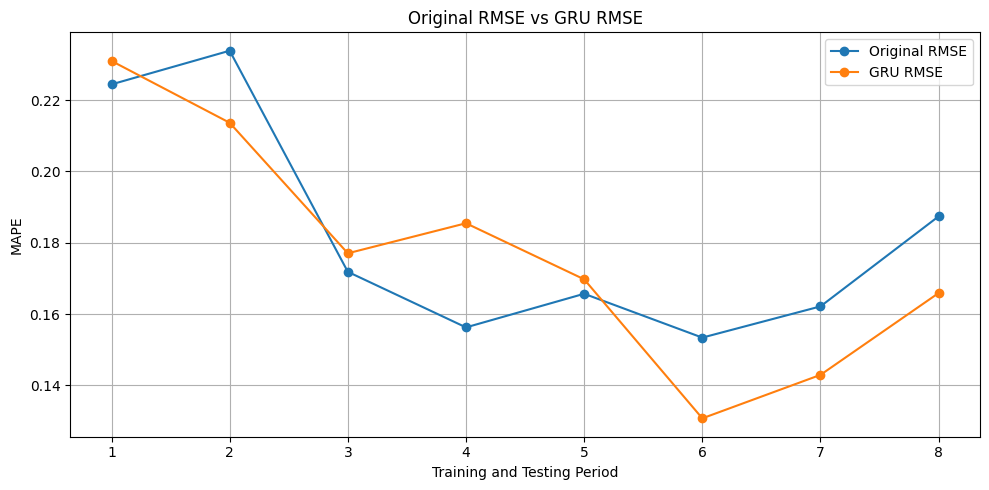

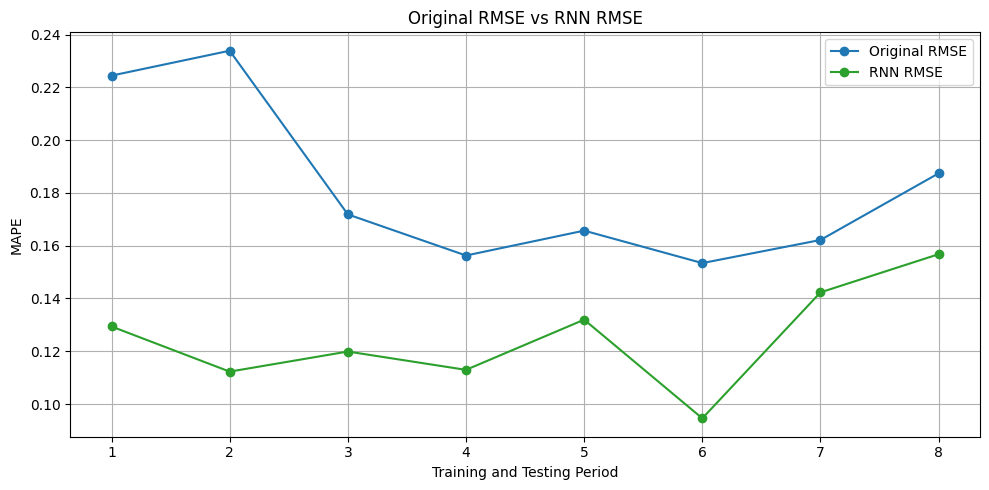

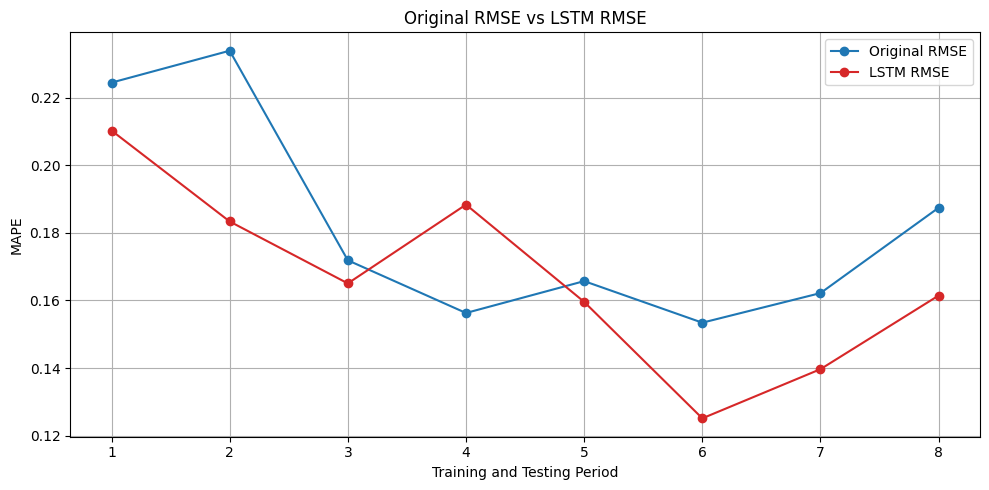

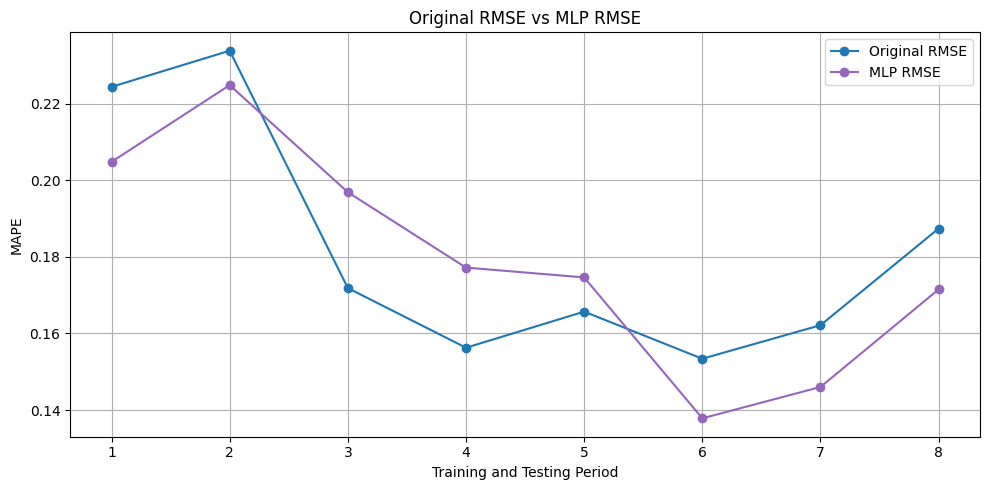

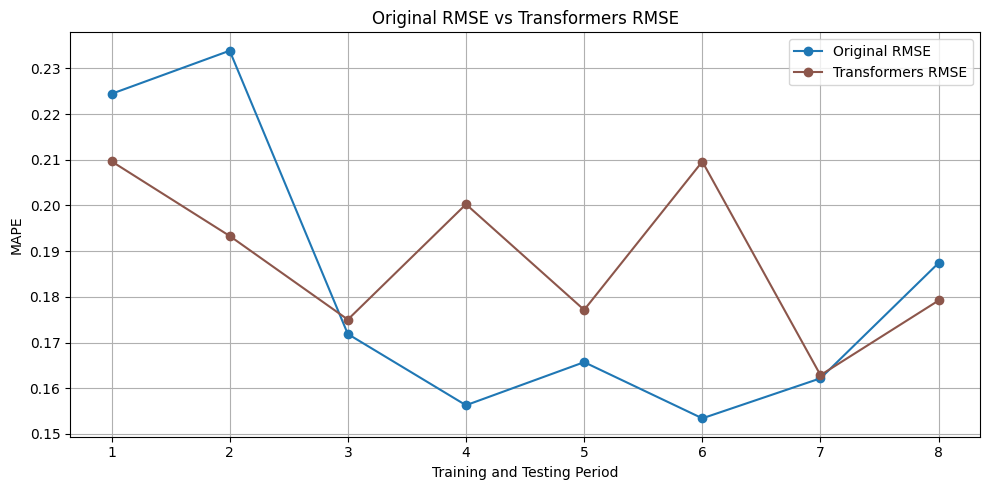

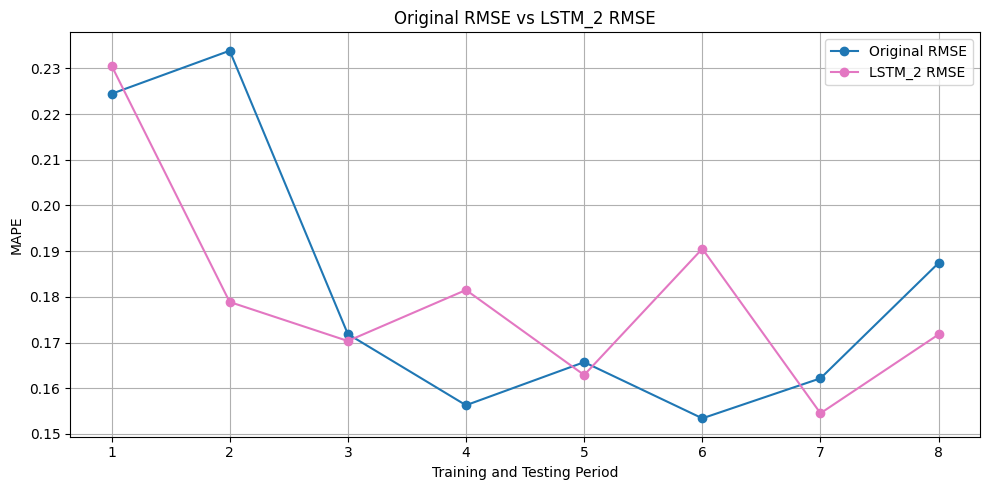

In [57]:
#plot the RMSE scores for model (NG)
plot_individual_comparisons(indices, Original_RMSE_ng, GRU_RMSE_ng, RNN_RMSE_ng, LSTM_RMSE_ng, MLP_RMSE_ng, Trans_RMSE_ng, LSTM_2_RMSE_ng,'RMSE')


For the RMSE scores for NG, we can see that RNN and LSTM perform the best as both model consistently has below the original's model RMSE scores

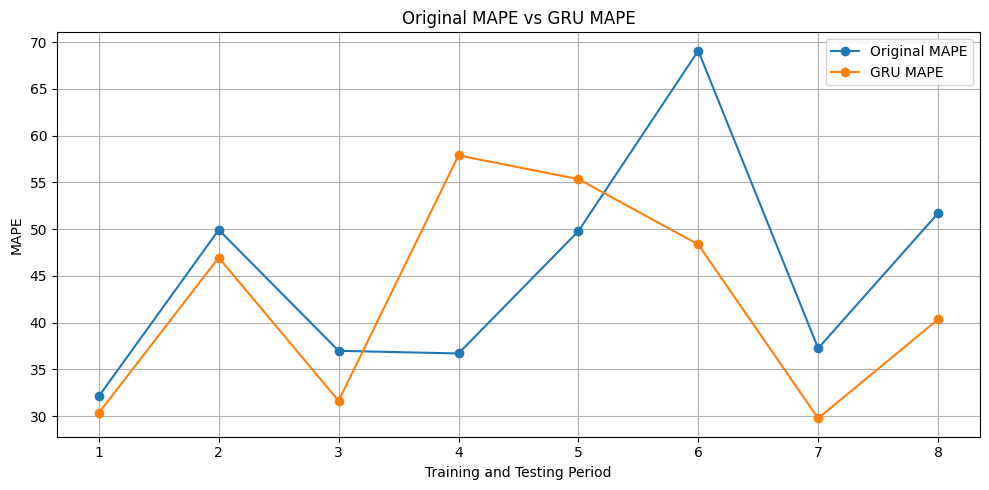

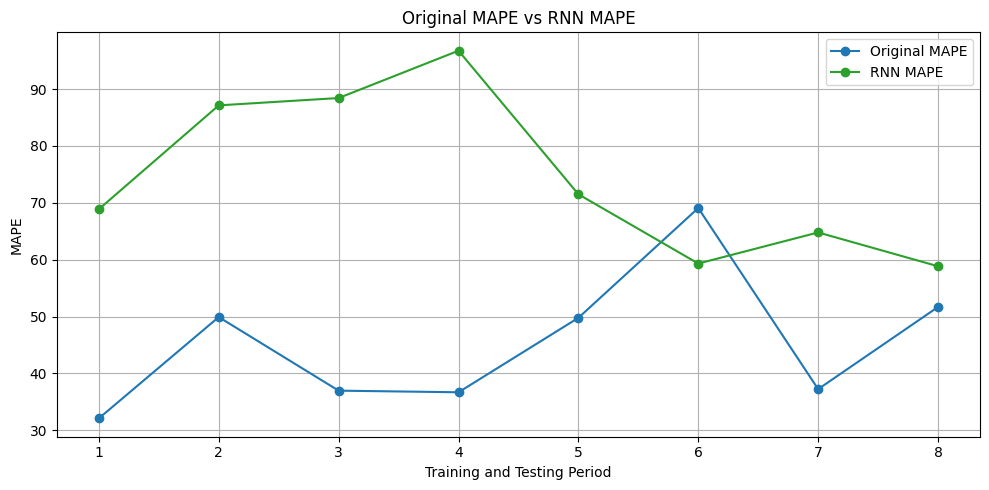

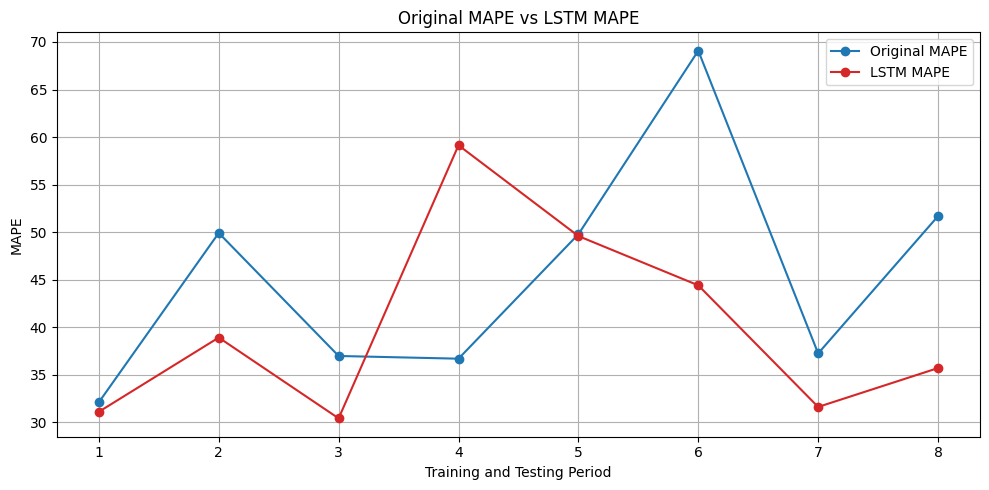

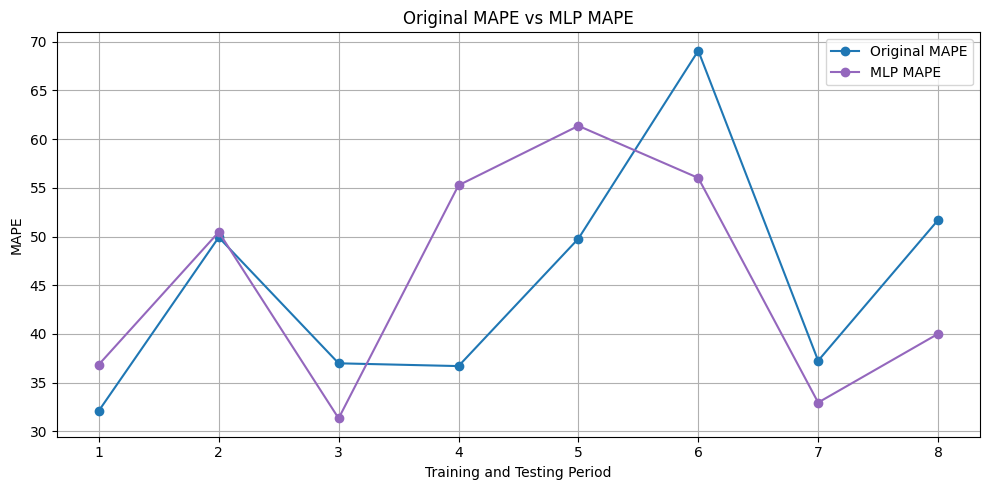

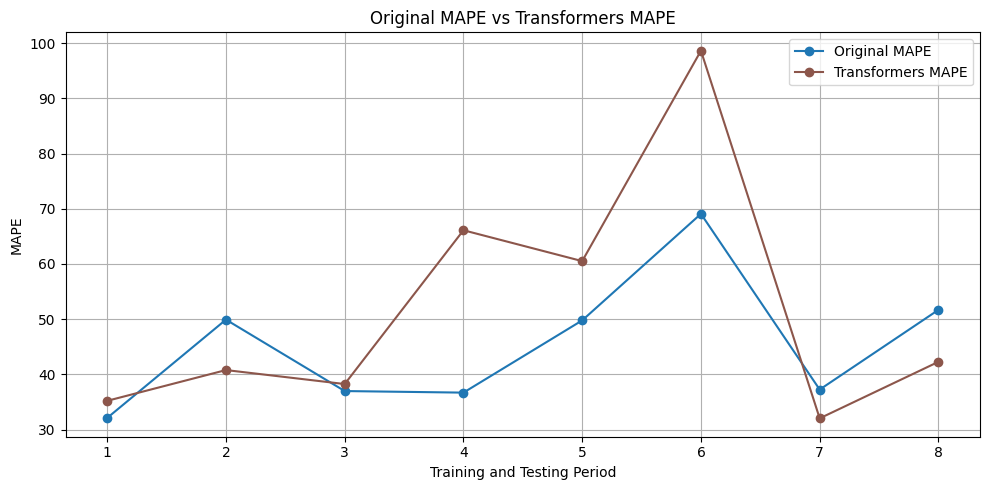

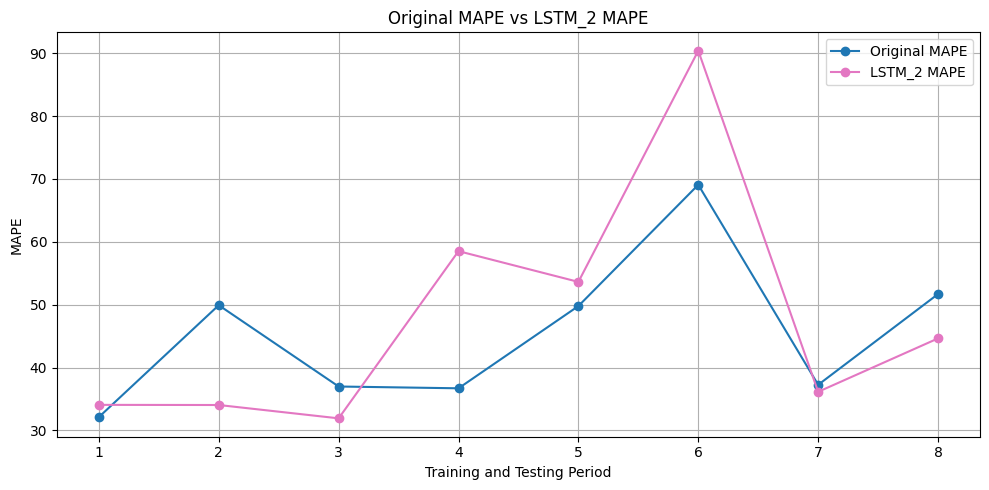

In [58]:
#plot the MAPE scores for model (NG)
plot_individual_comparisons(indices, Original_MAPE_ng, GRU_MAPE_ng, RNN_MAPE_ng, LSTM_MAPE_ng, MLP_MAPE_ng, Trans_MAPE_ng, LSTM_2_MAPE_ng,'MAPE')


For the MAPE scores for NG, only LSTM perform better as it was consistently below the original's model MAPE scores except for one instances.

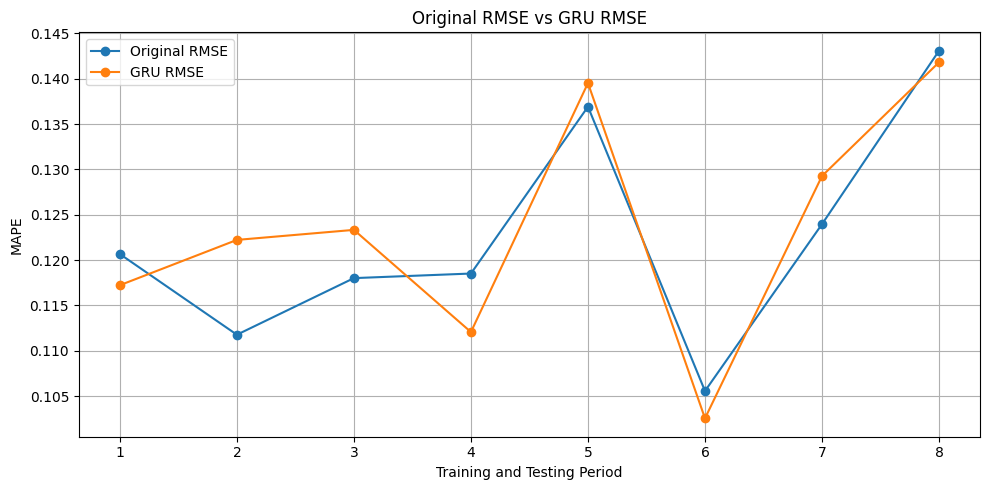

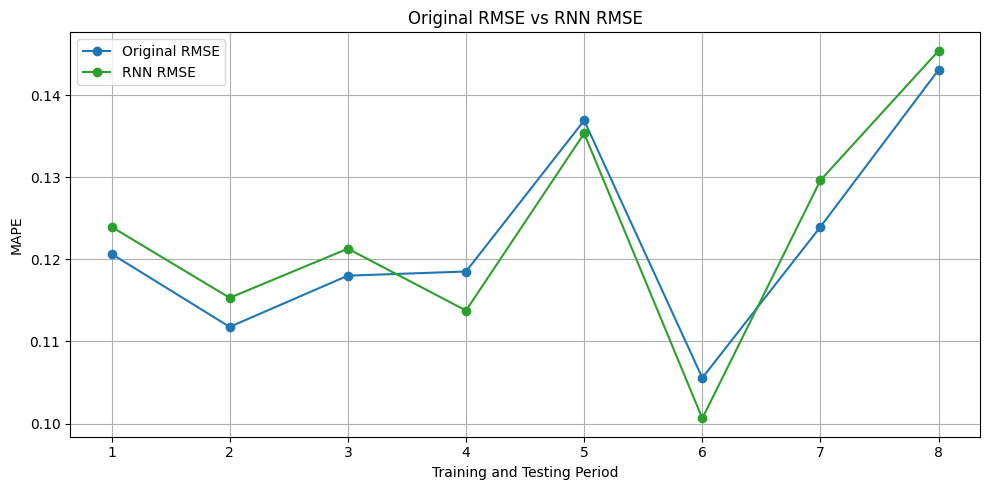

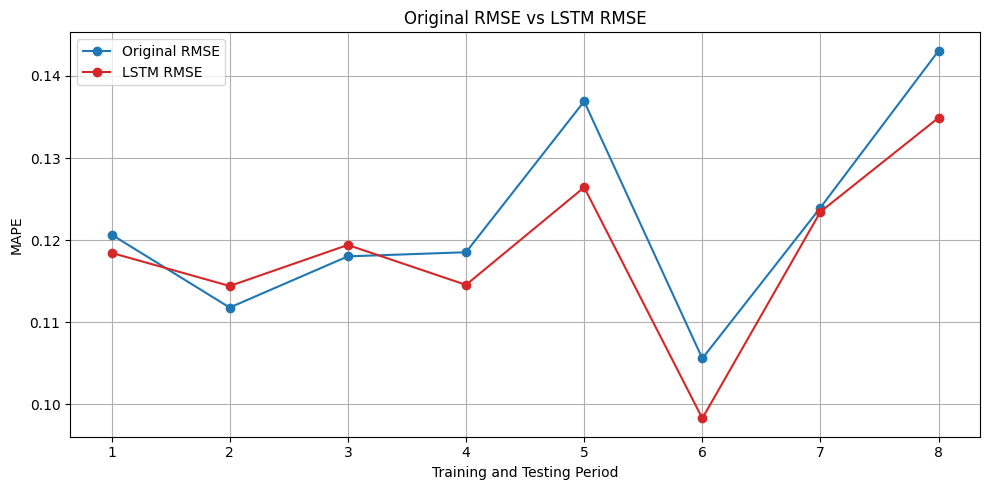

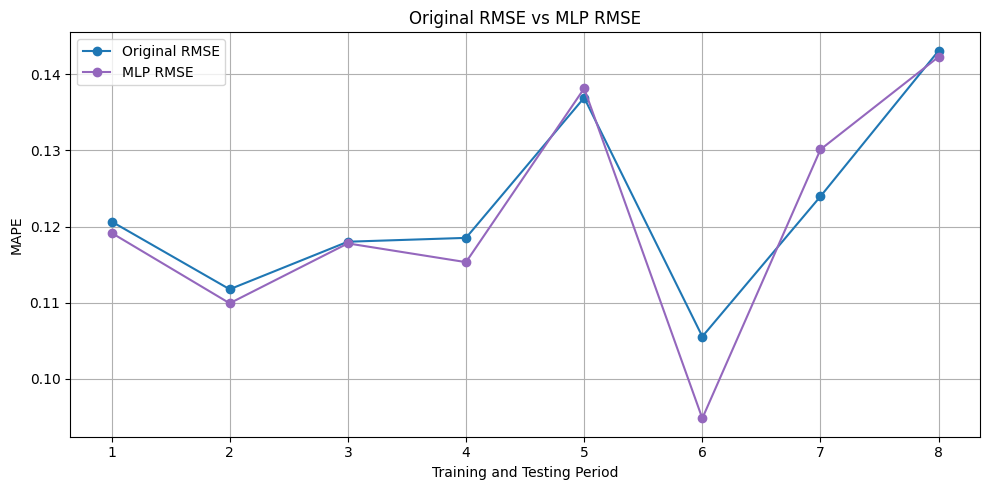

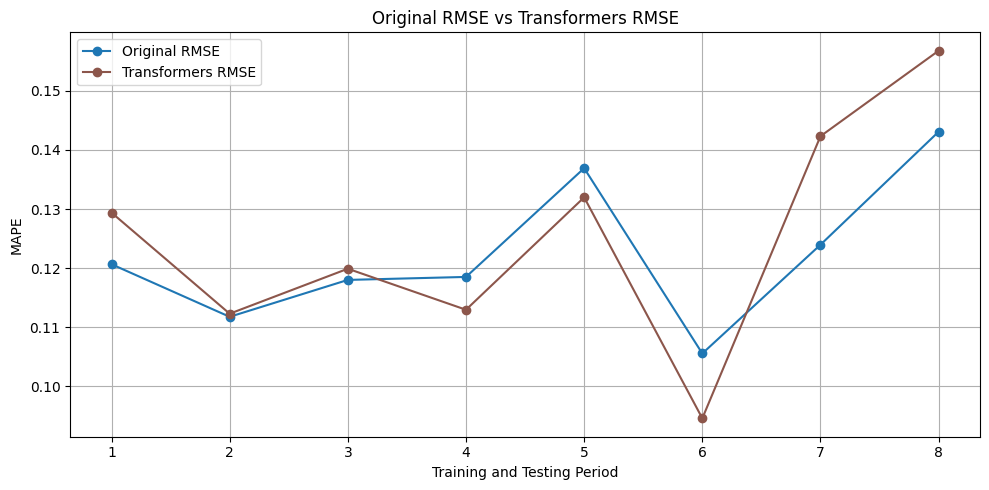

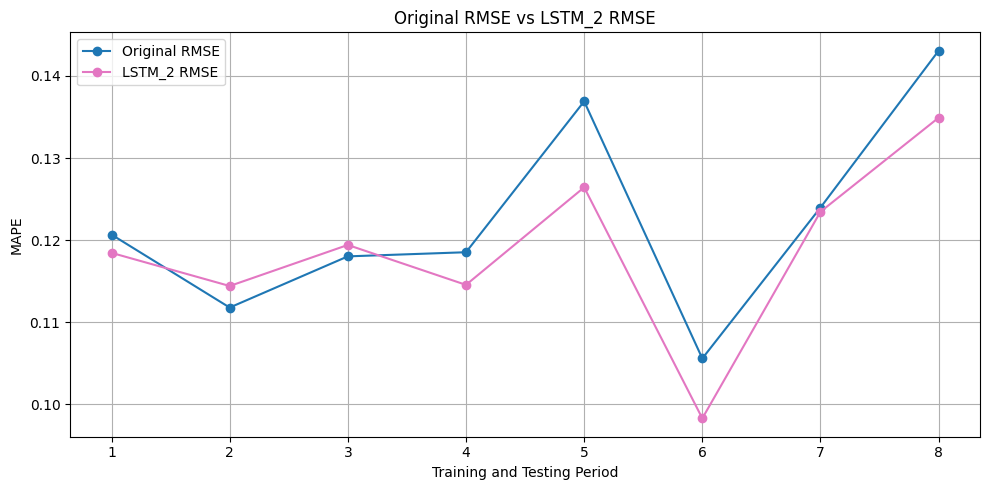

In [61]:
#plot the RMSE scores for model (Wind)
plot_individual_comparisons(indices, Original_RMSE_wind, GRU_RMSE_wind, RNN_RMSE_wind, LSTM_RMSE_wind, MLP_RMSE_wind, Trans_RMSE_wind, LSTM_RMSE_wind,'RMSE')


For wind, the RMSE was lower from the LSTM, MLP, and Transformers, LSTM2 models when compared to the original models

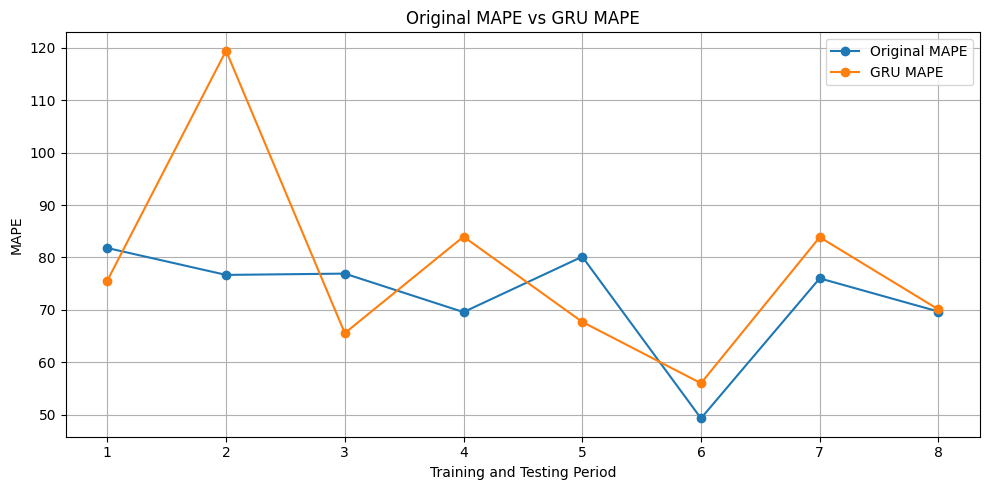

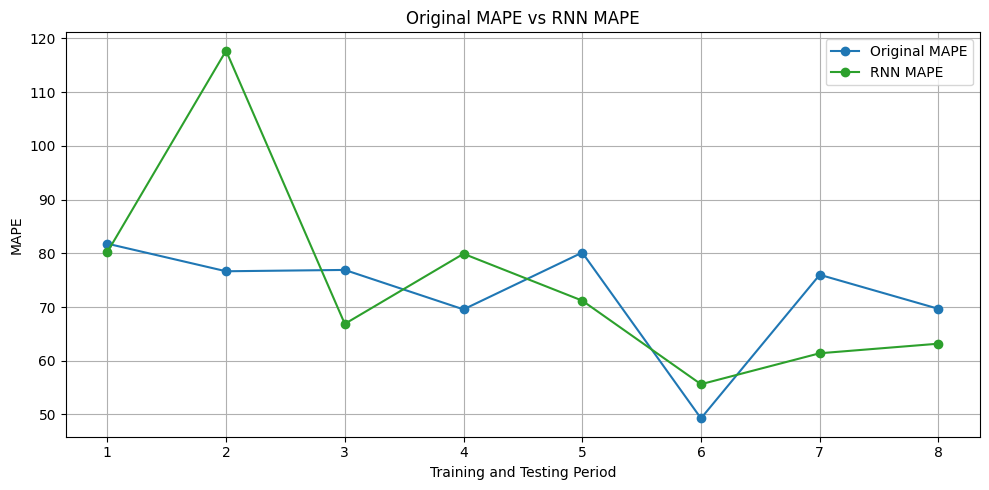

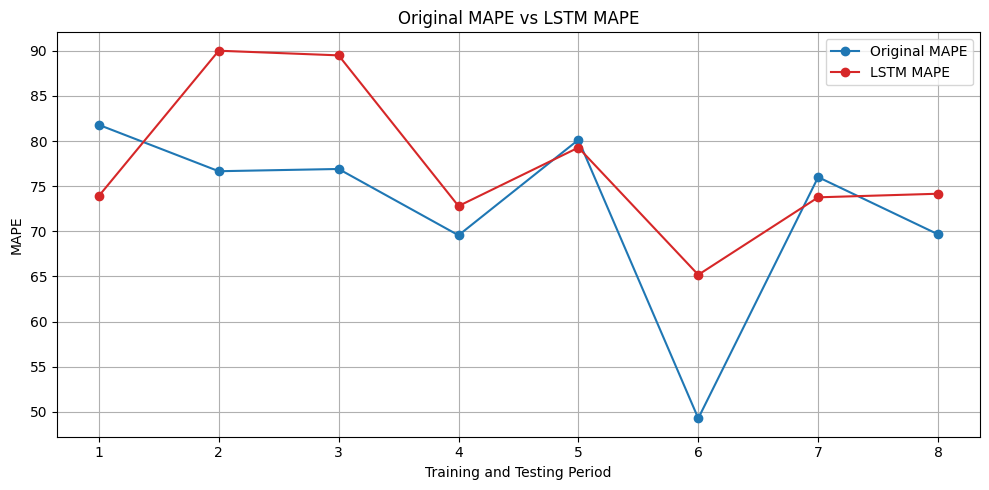

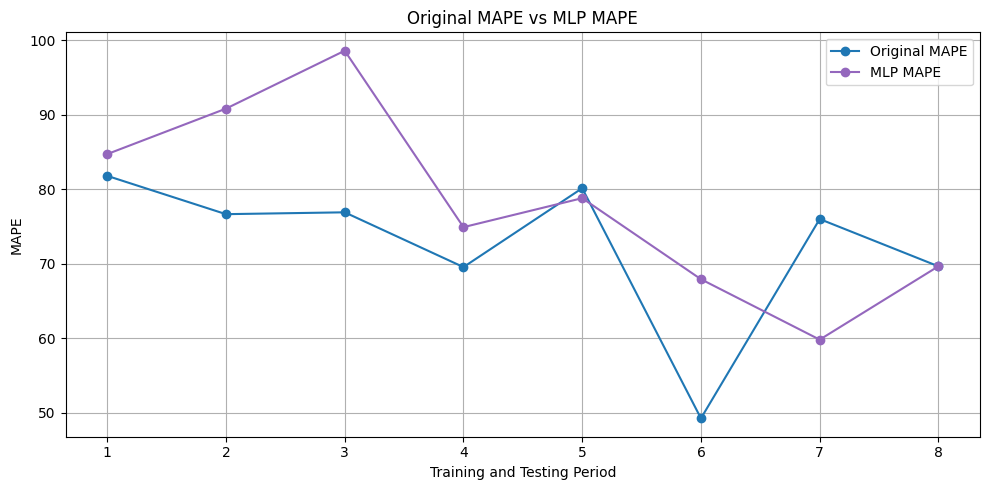

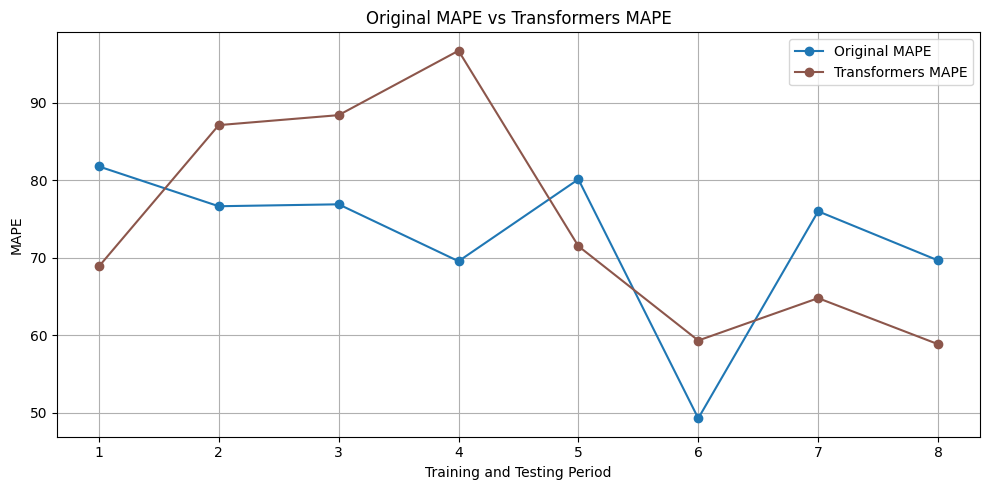

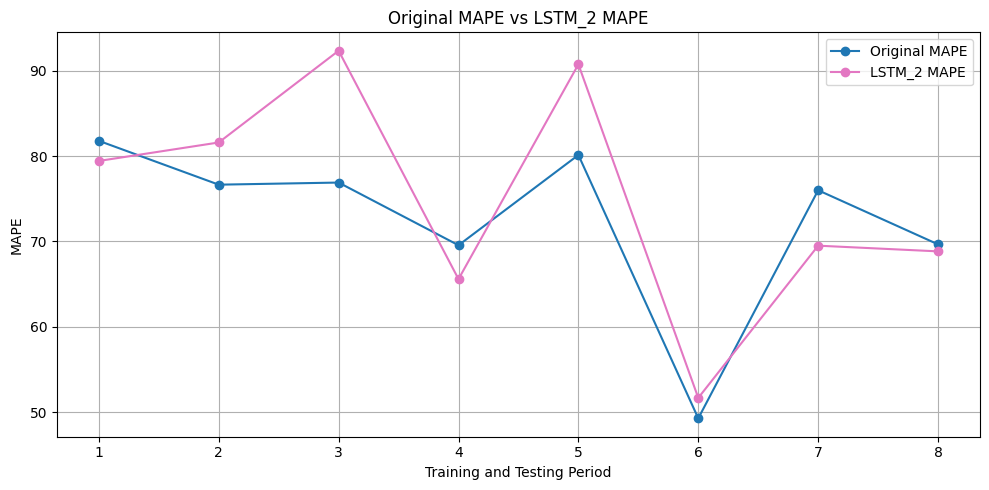

In [64]:
#plot the MAPE scores for model (Wind)
plot_individual_comparisons(indices, Original_MAPE_wind, GRU_MAPE_wind, RNN_MAPE_wind, LSTM_MAPE_wind, MLP_MAPE_wind, Trans_MAPE_wind, LSTM_2_MAPE_wind,'MAPE')


The MAPE scores for wind were off for all the models, out of all the models only LSTM and LSTM2 model perform well in the sense that it capture the trend/changes in scores, but beside that the RNN model also perform well.